In [2]:
import pickle

In [17]:
s0 = {'30': 3.0, '40': 4.0, '50': 5.0, '100': 10.0}

results = {}
for k, v in s0.items():
    with open(f'./s0_{k}.pkl', 'rb') as f:
        log = pickle.load(f)
    results[v] = log

In [20]:
N = {'15': 15, '20': 20, '25': 25, '30': 30}

results = {}
for k, v in N.items():
    with open(f'./N_{k}.pkl', 'rb') as f:
        log = pickle.load(f)
    results[v] = log

In [23]:
T_res = {'00': 0.0, '05': 0.5, '075': 0.75, '10': 1.0}

results = {}
for k, v in T_res.items():
    with open(f'./T_res_{k}_NR.pkl', 'rb') as f:
        log = pickle.load(f)
    results[v] = log

In [27]:
ab = {'05': (0.5, 1.0), '10': (1.0, 2.0), '20': (2.0, 4.0), '40': (4.0, 8.0)}

results = {}
for k, v in ab.items():
    with open(f'./ab_{k}.pkl', 'rb') as f:
        log = pickle.load(f)
    results[v] = log

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import numpy as np

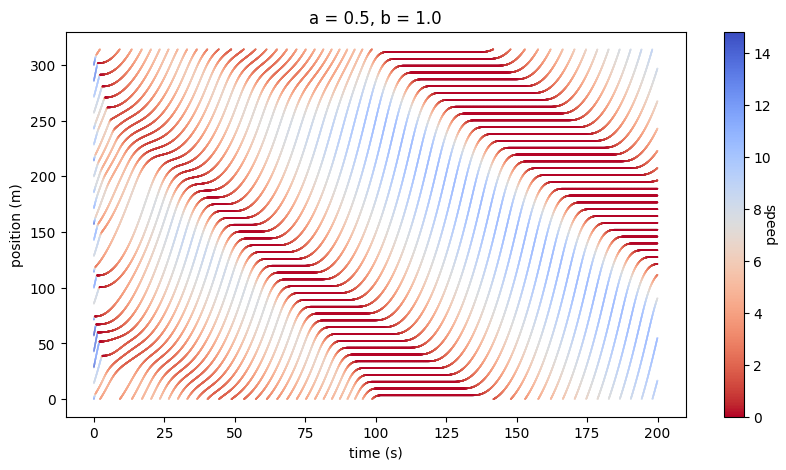

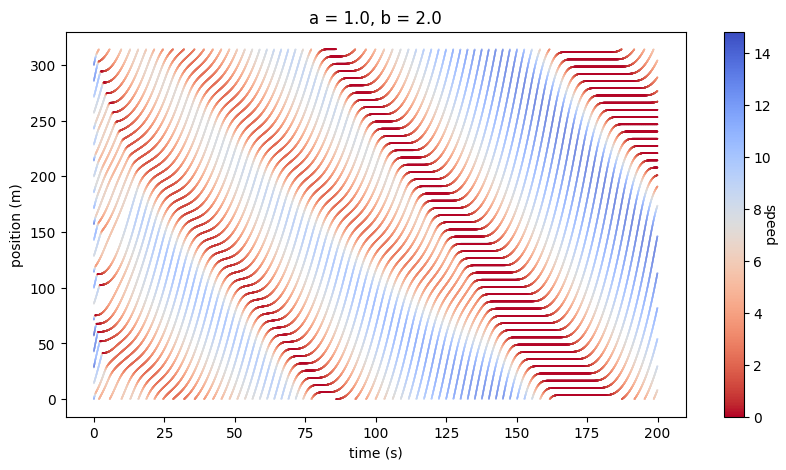

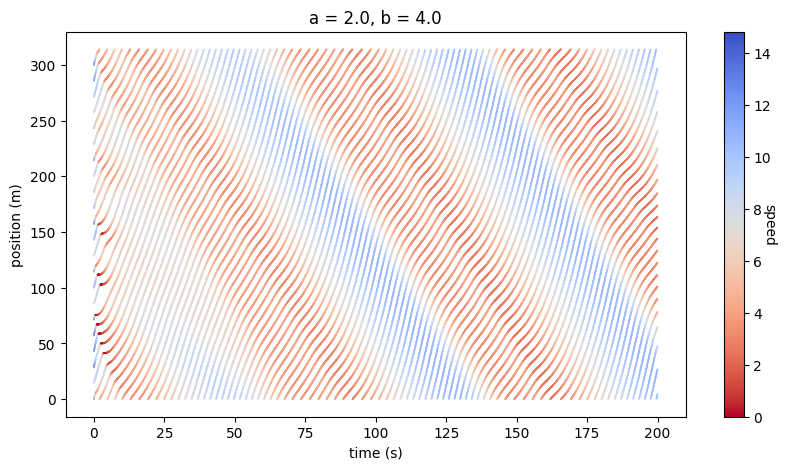

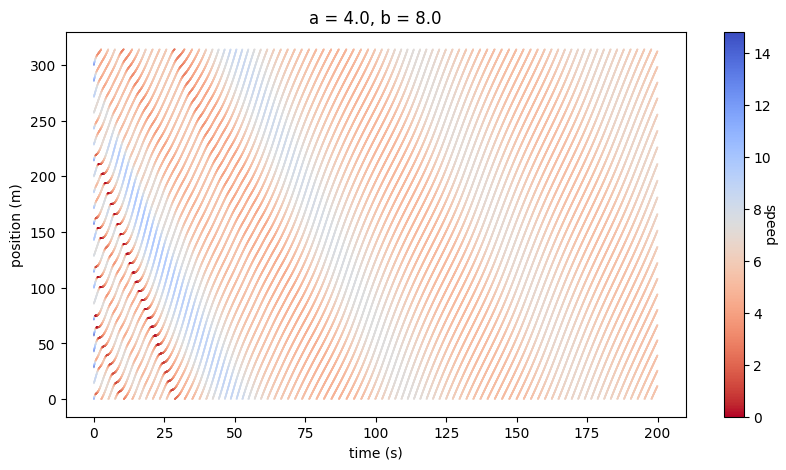

In [28]:
for key, result in results.items():
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlabel('time (s)')
    ax.set_ylabel('position (m)')
    ax.set_title(f'a = {key[0]}, b = {key[1]}')

    # Example data structure
    data = result

    # Extract x, y values and colors by using 0~1 float as color
    x, y, colors = [], [], []
    for element in data:
        x_value = element[0]
        if x_value < 200:
            for key, value in element[1].items():
                x.append(x_value)
                y.append(value[0])
                colors.append(value[1])
    colors = np.array(colors)

    # Create a colormap
    cmap = mpl.colormaps['coolwarm_r']
    norm = mcolors.Normalize(vmin=0, vmax=np.max(colors))

    # Create a scatter plot
    ax.scatter(x, y, c=colors, cmap=cmap, norm=norm, s=0.01)

    # Add a colorbar
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    cbar.set_label('speed', rotation=270)

    plt.show()


In [ ]:
# Example data structure
data = log

# Extract x, y values and colors by using 0~1 float as color
x, y, colors = [], [], []
for element in data:
    x_value = element[0]
    for key, value in element[1].items():
        x.append(x_value)
        y.append(value[0])
        colors.append(value[1])
colors = np.array(colors)

# Create a colormap
cmap = mpl.colormaps['coolwarm_r']
norm = mcolors.Normalize(vmin=0, vmax=np.max(colors))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

# Create a scatter plot
ax.scatter(x, y, c=colors, cmap=cmap, norm=norm, s=0.01)

# Add a colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('speed', rotation=270)

# Display plot
ax.set_xlabel('time')
ax.set_ylabel('position')
fig.suptitle('vehicle position over time')
plt.show()